[[1.61634653]
 [0.98910561]]
[[1.61634653]
 [0.98910561]]
[[1.61634653]
 [0.98910561]]
[1.51525548 0.99149333]


C:\Users\XP\AppData\Local\Temp\ipykernel_18592\898988014.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


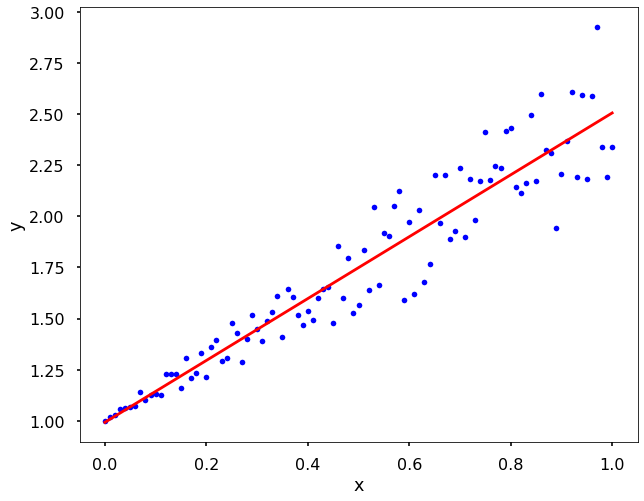

untuk x =  0.015 diprediksi y =  1.0142221656540078


In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

# bangkitkan x dan y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

# merakit matriks A
A = np.vstack([x, np.ones(len(x))]).T

# ubah y menjadi vektor kolom.
y = y[:, np.newaxis]

# 1. Regresi linear kuadrat terkecil langsung

alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print(alpha)

# 2. Regresi linear kuadrat terkecil menggunakan pseudo invers

pinv = np.linalg.pinv(A)
alpha = pinv.dot(y)
print(alpha)

# 3. Regresi linear kuadrat terkecil menggunakan numpy.linalg.lstsq

alpha = np.linalg.lstsq(A, y, rcond=None)[0]
print(alpha)

# 4. Regresi linear kuadrat terkecil menggunakan optimize.curve_fit from scipy

from scipy.optimize import curve_fit
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))
def func(x, a, b):
    y = a*x + b
    return y

alpha, covs = curve_fit(func, xdata = x, ydata = y)
print(alpha)

# plot the results
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

xa = 0.015
ya = alpha[0]*xa + alpha[1]

print('untuk x = ',xa, 'diprediksi y = ',ya)